## 第2章 順伝播型ネットワーク

### 2.1 ユニットの出力

図2.2：

In [2]:
from graphviz import Digraph

In [3]:
fig_2_2 = Digraph("fig_2_2", format="svg")
fig_2_2.body.extend(['rankdir=LR'])

fig_2_2.node('x3', u"x3", shape="circle")
fig_2_2.node('x4', u"x4", shape="circle")
fig_2_2.node('x1', u"x1", shape="circle")
fig_2_2.node('x2', u"x2", shape="circle")
fig_2_2.node('u1z1', u"{u1|z1}", shape="Mrecord", width="0.5", height="0.5", margin="0")
fig_2_2.node('u2z2', u"{u2|z2}", shape="Mrecord", width="0.5", height="0.5", margin="0")
fig_2_2.node('u3z3', u"{u3|z3}", shape="Mrecord", width="0.5", height="0.5", margin="0")
fig_2_2.node('z1', u"z1", shape="plaintext", width="0.1", height="0.1", margin="0.1")
fig_2_2.node('z2', u"z2", shape="plaintext", width="0.1", height="0.1", margin="0.1")
fig_2_2.node('z3', u"z3", shape="plaintext", width="0.1", height="0.1", margin="0.1")

fig_2_2.edge('x1', 'u1z1')
fig_2_2.edge('x1', 'u2z2')
fig_2_2.edge('x1', 'u3z3')
fig_2_2.edge('x2', 'u1z1')
fig_2_2.edge('x2', 'u2z2')
fig_2_2.edge('x2', 'u3z3')
fig_2_2.edge('x3', 'u1z1')
fig_2_2.edge('x3', 'u2z2')
fig_2_2.edge('x3', 'u3z3')
fig_2_2.edge('x4', 'u1z1')
fig_2_2.edge('x4', 'u2z2')
fig_2_2.edge('x4', 'u3z3')
fig_2_2.edge('u1z1', 'z1')
fig_2_2.edge('u2z2', 'z2')
fig_2_2.edge('u3z3', 'z3')

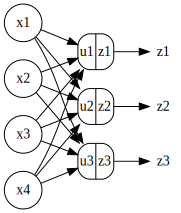

In [4]:
fig_2_2

式2.1〜2.3：

$$
\begin{eqnarray*}
\left[\begin{array}{cc}
u_1 \\ u_2 \\ u_3
\end{array}\right] &=& \left[\begin{array}{cc}
w_{1,1} & w_{1,2} & w_{1,3} & w_{1,4} \\
w_{2,1} & w_{2,2} & w_{2,3} & w_{2,4} \\
w_{3,1} & w_{3,2} & w_{3,3} & w_{3,4}
\end{array}\right] \cdot \left[\begin{array}{cc}
x_1 \\ x_2 \\ x_3 \\ x_4
\end{array}\right] + \left[\begin{array}{cc}
b_1 \\ b_2 \\ b_3
\end{array}\right]
\\
\left[\begin{array}{cc}
z_1 \\ z_2 \\ z_3
\end{array}\right] &=& \left[\begin{array}{cc}
f(u_1) \\ f(u_2) \\ f(u_3)
\end{array}\right]
\end{eqnarray*}
$$

$$
\begin{eqnarray*}
{\bf u} &=& {\bf Wx} + {\bf b}
\\
{\bf z} &=& {\bf f}({\bf u})
\end{eqnarray*}
$$

TensorFlow の書き方で書くと以下のような感じ：

In [5]:
import tensorflow as tf

入力 ${\bf x} = {}^t[x_1, x_2, \dots , x_I]$：

+ `tf.placeholder()` を利用（訓練データを入れるプレースホルダ）
  + 第1引数は数値の型（例：`tf.float32`）
  + 第2引数は `[None, 《要素数》]`

In [6]:
x = tf.placeholder(tf.float32, [None, 4])

ウェイト ${\bf W} = 《行列》$：

+ `tf.Variable()` を利用（学習パラメータ＝変数）
+ 値は、`tf.zeros()` または `tf.random_normal()` で初期化する。
  + （第1）引数は `[《入力の要素数》, 《出力の要素数＝ユニット数》]`

In [7]:
W = tf.Variable(tf.zeros([4, 3]))
# または
# W = tf.Variable(tf.random_normal([4, 3], mean=0.0, stddev=0.05))

バイアス ${\bf b} = {}^t[b_1, b_2, \dots , b_J]$：

+ `tf.Variable()` を利用（学習パラメータ＝変数）
+ 値は、`tf.zeros()` または `tf.random_normal()` で初期化する。
  + （第1）引数は `[《出力の要素数＝ユニット数》]`

In [8]:
b = tf.Variable(tf.zeros([3]))

ユニットの総入力 ${\bf u} = {}^t[u_1, u_2, \dots , u_J] = {\bf Wx + b}$：

In [10]:
u = tf.matmul(x,  W) + b
# または
# u = tf.add(tf.matmul(x,  W1), b1)

ユニットの出力 ${\bf z} = {}^t[z_1, z_2, \dots , z_J] = {\bf f}({\bf u})$：

In [ ]:
z = f(u)
# ただし f は次節で紹介する「活性化関数」のいずれか。

### 2.2 活性化関数

### 2.3 多層ネットワーク

### 2.4 出力層の設計と誤差関数

#### 2.4.1 学習の枠組み

#### 2.4.2 回帰

#### 2.4.3 二値分類

#### 2.4.4 多クラス分類